[Reference](https://towardsdatascience.com/text-analysis-feature-engineering-with-nlp-502d6ea9225d)

In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
!pwd
os.chdir('gdrive/My Drive/Colab Notebooks/')
!pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content
/content/gdrive/My Drive/Colab Notebooks


[Dataset Link](https://www.kaggle.com/rmisra/news-category-dataset)

In [3]:
## for data
import pandas as pd
import collections
import json## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud## for text processing
import re
import nltk## for language detection
!pip install langdetect
import langdetect ## for sentiment
from textblob import TextBlob## for ner
import spacy## for vectorizer
from sklearn import feature_extraction, manifold## for word embedding
import gensim.downloader as gensim_api## for topic modeling
import gensim

     |████████████████████████████████| 983kB 2.8MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=db7bcde3f32c7a93926f11a5b25eb6f95c09205036c14d28e8cb47824dbea8fa
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [4]:
lst_dics = []
with open('News_Category_Dataset_v2.json', mode='r', errors='ignore') as json_file:
    for dic in json_file:
        lst_dics.append( json.loads(dic) )## print the first one      
lst_dics[0]

{'authors': 'Melissa Jeltsen',
 'category': 'CRIME',
 'date': '2018-05-26',
 'headline': 'There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV',
 'link': 'https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89',
 'short_description': 'She left her husband. He killed their children. Just another day in America.'}

In [5]:
## create dtf
dtf = pd.DataFrame(lst_dics)

In [6]:
dtf.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [7]:
## filter categories
dtf = dtf[ dtf["category"].isin(['ENTERTAINMENT','POLITICS','TECH']) ][["category","headline"]]

In [8]:
## rename columns
dtf = dtf.rename(columns={"category":"y", "headline":"text"})

In [9]:
## print 5 random rows
dtf.sample(5)

,y,text
116730,POLITICS,Why I Am a Zionist
75248,ENTERTAINMENT,Donald Trump Learns How To Take A Joke In 'SNL...
56545,ENTERTAINMENT,Chris Evans Takes Us Back To The '90s With Cut...
31859,ENTERTAINMENT,Neil Patrick Harris' First Tattoo Is Terribly ...
31307,POLITICS,Kellyanne Conway Tries To Distance Donald Trum...


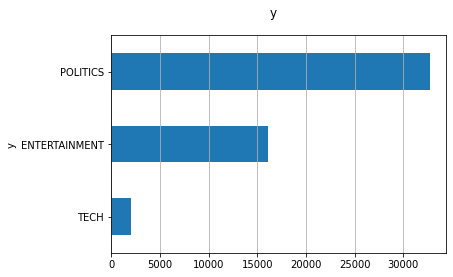

In [10]:
x = "y"
fig, ax = plt.subplots()
fig.suptitle(x, fontsize=12)
dtf[x].reset_index().groupby(x).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [12]:
txt = dtf["text"].iloc[0]
print(txt, " --> ", langdetect.detect(txt))

Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song  -->  en


In [19]:
dtf['lang'] = dtf["text"].apply(lambda x: langdetect.detect(x) \
                                if x.strip() != "" else "")
dtf.head()

,y,text,lang
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,en
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,en
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,en
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,en
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,en


In [22]:
dtf = dtf[dtf["lang"]=="en"]

# Text Preprocessing

In [23]:
print("--- original ---")
print(txt)

--- original ---
Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song


In [24]:
print("--- cleaning ---")
txt = re.sub(r'[^\w\s]', '', str(txt).lower().strip())
print(txt)

--- cleaning ---
will smith joins diplo and nicky jam for the 2018 world cups official song


In [25]:
print("--- tokenization ---")
txt = txt.split()
print(txt)

--- tokenization ---
['will', 'smith', 'joins', 'diplo', 'and', 'nicky', 'jam', 'for', 'the', '2018', 'world', 'cups', 'official', 'song']


In [27]:
nltk.download('stopwords')
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
print("--- remove stopwords ---")
txt = [word for word in txt if word not in lst_stopwords]
print(txt)

--- remove stopwords ---
['smith', 'joins', 'diplo', 'nicky', 'jam', '2018', 'world', 'cups', 'official', 'song']


In [29]:
print("--- stemming ---")
ps = nltk.stem.porter.PorterStemmer()
print([ps.stem(word) for word in txt])

--- stemming ---
['smith', 'join', 'diplo', 'nicki', 'jam', '2018', 'world', 'cup', 'offici', 'song']


In [47]:
nltk.download('wordnet')
print("--- lemmatisation ---")
lem = nltk.stem.wordnet.WordNetLemmatizer()
print([lem.lemmatize(word) for word in txt])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
--- lemmatisation ---
['smith', 'join', 'diplo', 'nicky', 'jam', '2018', 'world', 'cup', 'official', 'song']


In [31]:
'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [37]:
nltk.download('wordnet')
dtf["text_clean"] = dtf["text"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=None))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [33]:
dtf.head()

,y,text,lang,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,en,14,62,1,4.428571,14.0
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,en,10,38,1,3.800000,10.0
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,en,11,59,1,5.363636,11.0
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,en,13,59,1,4.538462,13.0
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,en,10,71,1,7.100000,10.0


In [38]:
print(dtf["text"].iloc[0], " --> ", dtf["text_clean"].iloc[0])

Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song  -->  will smith join diplo and nicky jam for the 2018 world cup official song


# Length Analysis

In [39]:
dtf['word_count'] = dtf["text"].apply(lambda x: len(str(x).split(" ")))
dtf['char_count'] = dtf["text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
dtf['sentence_count'] = dtf["text"].apply(lambda x: len(str(x).split(".")))
dtf['avg_word_length'] = dtf['char_count'] / dtf['word_count']
dtf['avg_sentence_lenght'] = dtf['word_count'] / dtf['sentence_count']
dtf.head()

,y,text,lang,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,text_clean
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,en,14,62,1,4.428571,14.0,will smith join diplo and nicky jam for the 20...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,en,10,38,1,3.800000,10.0,hugh grant marries for the first time at age 57
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,en,11,59,1,5.363636,11.0,jim carrey blast castrato adam schiff and demo...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,en,13,59,1,4.538462,13.0,julianna margulies us donald trump poop bag to...
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,en,10,71,1,7.100000,10.0,morgan freeman devastated that sexual harassme...


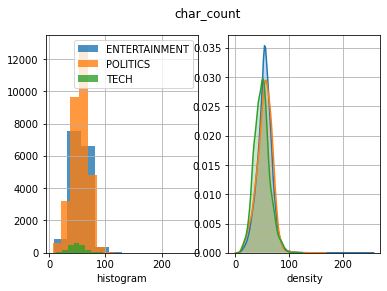

In [41]:
x, y = "char_count", "y"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for i in dtf[y].unique():
    sns.distplot(dtf[dtf[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(dtf[dtf[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(dtf[y].unique())
ax[1].grid(True)
plt.show()

# Sentiment Analysis

In [44]:
dtf["sentiment"] = dtf["text"].apply(lambda x: 
                   TextBlob(x).sentiment.polarity)
dtf.head()

,y,text,lang,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,text_clean,sentiment
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,en,14,62,1,4.428571,14.0,will smith join diplo and nicky jam for the 20...,0.000000
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,en,10,38,1,3.800000,10.0,hugh grant marries for the first time at age 57,0.250000
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,en,11,59,1,5.363636,11.0,jim carrey blast castrato adam schiff and demo...,0.136364
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,en,13,59,1,4.538462,13.0,julianna margulies us donald trump poop bag to...,0.000000
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,en,10,71,1,7.100000,10.0,morgan freeman devastated that sexual harassme...,0.500000


In [45]:
print(dtf["text"].iloc[0], " --> ", dtf["sentiment"].iloc[0])

Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song  -->  0.0


# Named-Entity Recognition

In [50]:
!python -m spacy download en_core_web_lg
import en_core_web_lg
## call model
ner = en_core_web_lg.load()

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=03ff72d5d6bd27f7ccbaa66297d07b5ee05aae9cece1928e99281055381a5dd7
  Stored in directory: /tmp/pip-ephem-wheel-cache-v890qnam/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [51]:
## tag text
txt = dtf["text"].iloc[0]
doc = ner(txt)

In [52]:
## display result
spacy.displacy.render(doc, style="ent")

'<div class="entities" style="line-height: 2.5; direction: ltr">\n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Will Smith\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n Joins \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Diplo\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n And \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Nicky Jam\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-tran

In [53]:
## tag text and exctract tags into a list
dtf["tags"] = dtf["text"].apply(lambda x: [(tag.text, tag.label_) 
                                for tag in ner(x).ents] )## utils function to count the element of a list
def utils_lst_count(lst):
    dic_counter = collections.Counter()
    for x in lst:
        dic_counter[x] += 1
    dic_counter = collections.OrderedDict( 
                     sorted(dic_counter.items(), 
                     key=lambda x: x[1], reverse=True))
    lst_count = [ {key:value} for key,value in dic_counter.items() ]
    return lst_count
## count tags
dtf["tags"] = dtf["tags"].apply(lambda x: utils_lst_count(x))
## utils function create new column for each tag category
def utils_ner_features(lst_dics_tuples, tag):
    if len(lst_dics_tuples) > 0:
        tag_type = []
        for dic_tuples in lst_dics_tuples:
            for tuple in dic_tuples:
                type, n = tuple[1], dic_tuples[tuple]
                tag_type = tag_type + [type]*n
                dic_counter = collections.Counter()
                for x in tag_type:
                    dic_counter[x] += 1
        return dic_counter[tag]
    else:
        return 0
## extract features
tags_set = []
for lst in dtf["tags"].tolist():
     for dic in lst:
          for k in dic.keys():
              tags_set.append(k[1])
tags_set = list(set(tags_set))
for feature in tags_set:
     dtf["tags_"+feature] = dtf["tags"].apply(lambda x: 
                             utils_ner_features(x, feature))
## print result
dtf.head()

,y,text,lang,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,text_clean,sentiment,tags,tags_GPE,tags_QUANTITY,tags_ORG,tags_DATE,tags_EVENT,tags_LAW,tags_WORK_OF_ART,tags_NORP,tags_TIME,tags_PERCENT,tags_FAC,tags_LOC,tags_PRODUCT,tags_ORDINAL,tags_CARDINAL,tags_MONEY,tags_LANGUAGE,tags_PERSON
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,en,14,62,1,4.428571,14.0,will smith join diplo and nicky jam for the 20...,0.000000,"[{('Will Smith', 'PERSON'): 1}, {('Diplo', 'PE...",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,en,10,38,1,3.800000,10.0,hugh grant marries for the first time at age 57,0.250000,"[{('Hugh Grant Marries', 'PERSON'): 1}, {('Age...",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,en,11,59,1,5.363636,11.0,jim carrey blast castrato adam schiff and demo...,0.136364,"[{('Jim Carrey', 'PERSON'): 1}, {('Adam Schiff...",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,en,13,59,1,4.538462,13.0,julianna margulies us donald trump poop bag to...,0.000000,"[{('Julianna Margulies', 'PERSON'): 1}]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,en,10,71,1,7.100000,10.0,morgan freeman devastated that sexual harassme...,0.500000,"[{('Morgan Freeman '', 'ORG'): 1}]",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


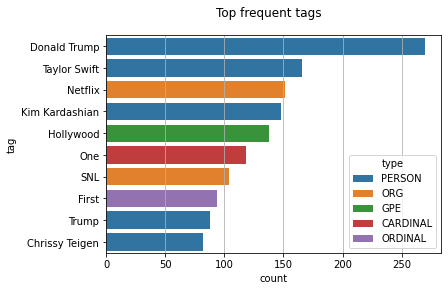

In [59]:
y = "ENTERTAINMENT"
top = 10

tags_list = dtf[dtf["y"]==y]["tags"].sum()
map_lst = list(map(lambda x: list(x.keys())[0], tags_list))
dtf_tags = pd.DataFrame(map_lst, columns=['tag','type'])
dtf_tags["count"] = 1
dtf_tags = dtf_tags.groupby(['type',  
                'tag']).count().reset_index().sort_values("count", 
                 ascending=False)
fig, ax = plt.subplots()
fig.suptitle("Top frequent tags", fontsize=12)
sns.barplot(x="count", y="tag", hue="type", 
            data=dtf_tags.iloc[:top,:], dodge=False, ax=ax)
ax.grid(axis="x")
plt.show()

In [55]:
## predict wit NER
txt = dtf["text"].iloc[0]
entities = ner(txt).ents## tag text
tagged_txt = txt
for tag in entities:
    tagged_txt = re.sub(tag.text, "_".join(tag.text.split()), 
                        tagged_txt) ## show result
print(tagged_txt)

Will_Smith Joins Diplo And Nicky_Jam For The_2018_World_Cup's Official Song


# Word Frequency

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


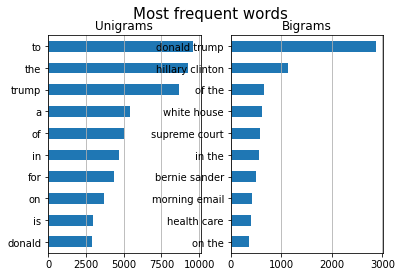

In [60]:
nltk.download('punkt')
y = "POLITICS"
corpus = dtf[dtf["y"]==y]["text_clean"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

In [62]:
lst_words = ["box office", "republican", "apple"]## count
lst_grams = [len(word.split(" ")) for word in lst_words]
vectorizer = feature_extraction.text.CountVectorizer(
                 vocabulary=lst_words, 
                 ngram_range=(min(lst_grams),max(lst_grams)))
dtf_X = pd.DataFrame(vectorizer.fit_transform(dtf["text_clean"]).todense(), columns=lst_words)## add the new features as columns
dtf = pd.concat([dtf, dtf_X.set_index(dtf.index)], axis=1)
dtf.head()

,y,text,lang,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,text_clean,sentiment,tags,tags_GPE,tags_QUANTITY,tags_ORG,tags_DATE,tags_EVENT,tags_LAW,tags_WORK_OF_ART,tags_NORP,tags_TIME,tags_PERCENT,tags_FAC,tags_LOC,tags_PRODUCT,tags_ORDINAL,tags_CARDINAL,tags_MONEY,tags_LANGUAGE,tags_PERSON,box office,republican,apple
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,en,14,62,1,4.428571,14.0,will smith join diplo and nicky jam for the 20...,0.000000,"[{('Will Smith', 'PERSON'): 1}, {('Diplo', 'PE...",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,en,10,38,1,3.800000,10.0,hugh grant marries for the first time at age 57,0.250000,"[{('Hugh Grant Marries', 'PERSON'): 1}, {('Age...",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,en,11,59,1,5.363636,11.0,jim carrey blast castrato adam schiff and demo...,0.136364,"[{('Jim Carrey', 'PERSON'): 1}, {('Adam Schiff...",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,en,13,59,1,4.538462,13.0,julianna margulies us donald trump poop bag to...,0.000000,"[{('Julianna Margulies', 'PERSON'): 1}]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,en,10,71,1,7.100000,10.0,morgan freeman devastated that sexual harassme...,0.500000,"[{('Morgan Freeman '', 'ORG'): 1}]",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
lst_words = ["box office", "republican", "apple"]## count
lst_grams = [len(word.split(" ")) for word in lst_words]
vectorizer = feature_extraction.text.CountVectorizer(
                 vocabulary=lst_words, 
                 ngram_range=(min(lst_grams),max(lst_grams)))
dtf_X = pd.DataFrame(vectorizer.fit_transform(dtf["text_clean"]).todense(), columns=lst_words)## add the new features as columns
dtf = pd.concat([dtf, dtf_X.set_index(dtf.index)], axis=1)
dtf.head()

,y,text,lang,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,text_clean,sentiment,tags,tags_GPE,tags_QUANTITY,tags_ORG,tags_DATE,tags_EVENT,tags_LAW,tags_WORK_OF_ART,tags_NORP,tags_TIME,tags_PERCENT,tags_FAC,tags_LOC,tags_PRODUCT,tags_ORDINAL,tags_CARDINAL,tags_MONEY,tags_LANGUAGE,tags_PERSON,box office,republican,apple,box office,republican,apple
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,en,14,62,1,4.428571,14.0,will smith join diplo and nicky jam for the 20...,0.000000,"[{('Will Smith', 'PERSON'): 1}, {('Diplo', 'PE...",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,en,10,38,1,3.800000,10.0,hugh grant marries for the first time at age 57,0.250000,"[{('Hugh Grant Marries', 'PERSON'): 1}, {('Age...",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,en,11,59,1,5.363636,11.0,jim carrey blast castrato adam schiff and demo...,0.136364,"[{('Jim Carrey', 'PERSON'): 1}, {('Adam Schiff...",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,en,13,59,1,4.538462,13.0,julianna margulies us donald trump poop bag to...,0.000000,"[{('Julianna Margulies', 'PERSON'): 1}]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,en,10,71,1,7.100000,10.0,morgan freeman devastated that sexual harassme...,0.500000,"[{('Morgan Freeman '', 'ORG'): 1}]",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Word Vectors

In [65]:
nlp = gensim_api.load("glove-wiki-gigaword-300")

[==================================================] 100.0% 376.1/376.1MB downloaded


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [66]:
word = "love"
nlp[word]

array([-4.5205e-01, -3.3122e-01, -6.3607e-02,  2.8325e-02, -2.1372e-01,
        1.6839e-01, -1.7186e-02,  4.7309e-02, -5.2355e-02, -9.8706e-01,
        5.3762e-01, -2.6893e-01, -5.4294e-01,  7.2487e-02,  6.6193e-02,
       -2.1814e-01, -1.2113e-01, -2.8832e-01,  4.8161e-01,  6.9185e-01,
       -2.0022e-01,  1.0082e+00, -1.1865e-01,  5.8710e-01,  1.8482e-01,
        4.5799e-02, -1.7836e-02, -3.3952e-01,  2.9314e-01, -1.9951e-01,
       -1.8930e-01,  4.3267e-01, -6.3181e-01, -2.9510e-01, -1.0547e+00,
        1.8231e-01, -4.5040e-01, -2.7800e-01, -1.4021e-01,  3.6785e-02,
        2.6487e-01, -6.6712e-01, -1.5204e-01, -3.5001e-01,  4.0864e-01,
       -7.3615e-02,  6.7630e-01,  1.8274e-01, -4.1660e-02,  1.5014e-02,
        2.5216e-01, -1.0109e-01,  3.1915e-02, -1.1298e-01, -4.0147e-01,
        1.7274e-01,  1.8497e-03,  2.4456e-01,  6.8777e-01, -2.7019e-01,
        8.0728e-01, -5.8296e-02,  4.0550e-01,  3.9893e-01, -9.1688e-02,
       -5.2080e-01,  2.4570e-01,  6.3001e-02,  2.1421e-01,  3.31

In [67]:
nlp[word].shape

(300,)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Text(5, 2, 'love')

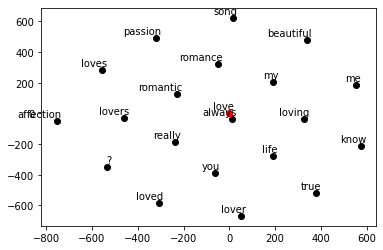

In [70]:
## find closest vectors
labels, X, x, y = [], [], [], []
for t in nlp.most_similar(word, topn=20):
    X.append(nlp[t[0]])
    labels.append(t[0])
    
## reduce dimensions
pca = manifold.TSNE(perplexity=40, n_components=2, init='pca')
new_values = pca.fit_transform(X)
for value in new_values:
    x.append(value[0])
    y.append(value[1])

## plot
fig = plt.figure()
for i in range(len(x)):
    plt.scatter(x[i], y[i], c="black")
    plt.annotate(labels[i], xy=(x[i],y[i]), xytext=(5,2), 
               textcoords='offset points', ha='right', va='bottom')

## add center
plt.scatter(x=0, y=0, c="red")
plt.annotate(word, xy=(0,0), xytext=(5,2), textcoords='offset points', ha='right', va='bottom')

# Topic Modeling

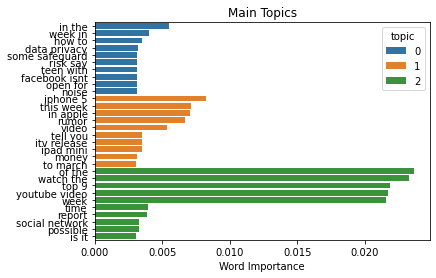

In [71]:
y = "TECH"
corpus = dtf[dtf["y"]==y]["text_clean"]
## pre-process corpus
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i + 2]) for i in range(0, 
                     len(lst_words), 2)]
    lst_corpus.append(lst_grams)## map words to an id
id2word = gensim.corpora.Dictionary(lst_corpus)## create dictionary word:freq
dic_corpus = [id2word.doc2bow(word) for word in lst_corpus] ## train LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=dic_corpus, id2word=id2word, num_topics=3, random_state=123, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
   
## output
lst_dics = []
for i in range(0,3):
    lst_tuples = lda_model.get_topic_terms(i)
    for tupla in lst_tuples:
        lst_dics.append({"topic":i, "id":tupla[0], 
                         "word":id2word[tupla[0]], 
                         "weight":tupla[1]})
dtf_topics = pd.DataFrame(lst_dics, 
                         columns=['topic','id','word','weight'])
    
## plot
fig, ax = plt.subplots()
sns.barplot(y="word", x="weight", hue="topic", data=dtf_topics, dodge=False, ax=ax).set_title('Main Topics')
ax.set(ylabel="", xlabel="Word Importance")
plt.show()